In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# Blood donations Dataset
test_data= pd.read_csv('BloodDonationPredictions/TestDataBlood.csv')
training_data = pd.read_csv('BloodDonationPredictions/TrainingDataBlood.csv')
# displaying the test_data table contents
data = pd.DataFrame(test_data)
data



,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34
5,500,3,21,5250,42
6,530,4,2,500,4
7,244,14,1,250,14
8,249,23,2,500,87
9,728,14,4,1000,64


In [3]:
training_data = pd.read_csv('BloodDonationPredictions/TrainingDataBlood.csv')
data = pd.DataFrame(training_data)
data



,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
5,335,4,4,1000,4,0
6,47,2,7,1750,14,1
7,164,1,12,3000,35,0
8,736,5,46,11500,98,1
9,436,0,3,750,4,0


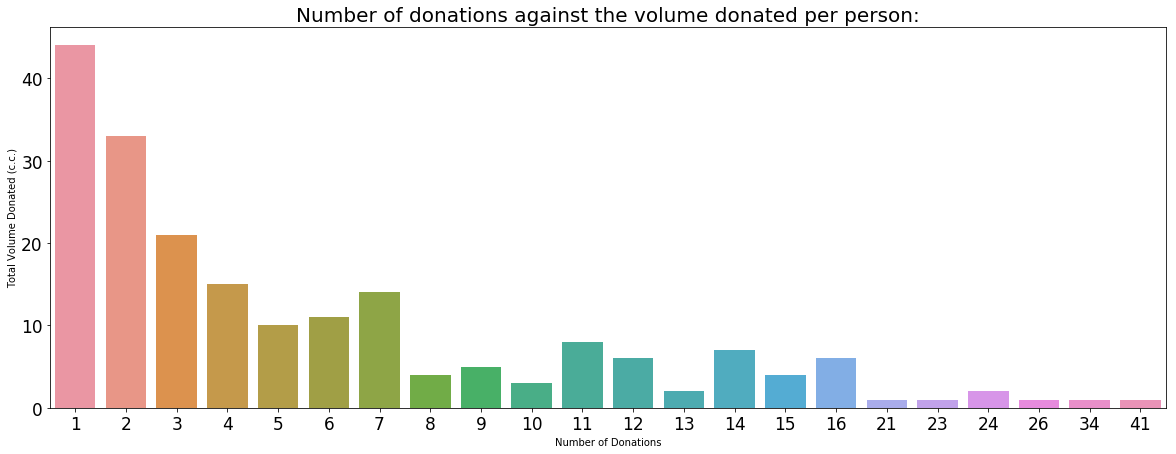

In [6]:
# number of donations against total volume donated
# donations_volume = pd.DataFrame(test_data['Number of Donations'].value_counts())
# donations_volume.reset_index(inplace=True)
donations_volume.columns = ['Number of Donations', 'Total Volume Donated (c.c.)']

donations_volume=pd.DataFrame(donations_volume)
donations_volume
plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=donations_volume['Number of Donations'], y=donations_volume['Total Volume Donated (c.c.)'])
barplot.set(xlabel='Number of Donations', ylabel='Total Volume Donated (c.c.)')
plt.title('Number of donations against the volume donated per person:', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()